In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn
from circularcoordinates import weighted_circular_coordinate, weight_degree_sum_meta
from dataset import noisy_knot

In [2]:
_ = noisy_knot(True)
data, coord = [_[el] for el in ['data', 'coord']]
prime = 47
eps = 1.2

In [3]:
fts = [
    None,
    lambda x: 1 / np.sqrt(x), lambda x: 1 / x,
    lambda x: 1 / x ** 2, lambda x: 1 / x ** 4,
]
labels = [
    'Original',
    '$1/x^{0.5}$', '$1/x$',
    '$1/x^2$', '$1/x^4$',
]

In [4]:
results = np.mod(np.asarray([weighted_circular_coordinate(
    data,
    weight_degree_sum_meta(ft),
    prime=prime,
    order=0,
    eps=eps
) for ft in tqdm(fts)]), 1.0)

100%|██████████| 5/5 [00:13<00:00,  2.62s/it]


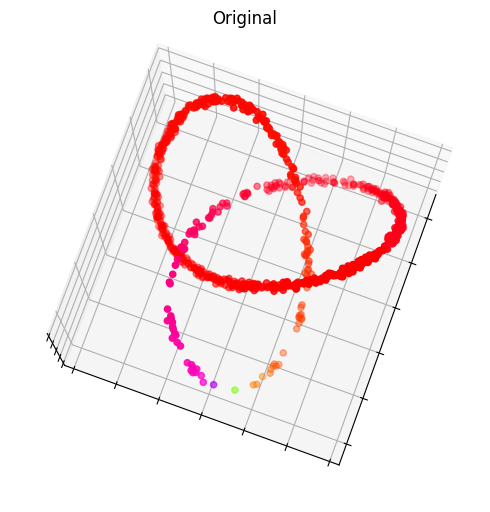

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.scatter(*data.T, c=results[0], cmap='hsv')
ax.view_init(elev=80, azim=20)
plt.tight_layout()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.title('Original')
plt.show()
plt.close()

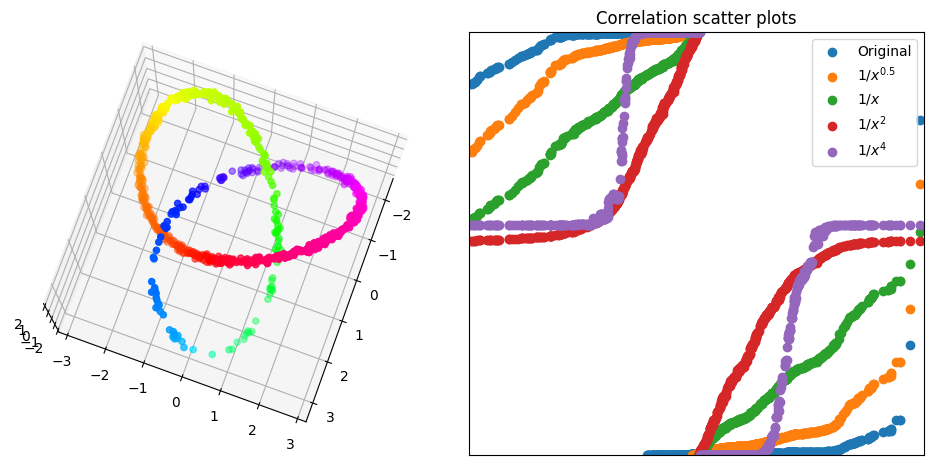

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(*data.T, c=results[2], cmap='hsv')
ax.view_init(elev=80, azim=20)
ax = fig.add_subplot(1, 2, 2)
for result, label in zip(results, labels):
    ax.scatter(coord, result, label=label)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(0, 1)
plt.legend()
ax.set_title('Correlation scatter plots')
plt.tight_layout()
plt.show()
plt.close()

In [7]:
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
if eps is not None:
    ccl.eps=eps
ccl.cc_original()
ccl.f_reset_L2()
hyper_params = [
    {'epoch': 70, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 7000, 'lr': 0.05, 'p_norm': 3},
    {'epoch': 7000, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 7000, 'lr': 0.01, 'p_norm': 5},
    {'epoch': 30000, 'lr': 0.01, 'p_norm': 6},
    {'epoch': 30000, 'lr': 0.01, 'p_norm': 10},
    # {'epoch': 30000, 'lr': 0.01, 'p_norm': np.inf},
]
lp_results = []
for param in hyper_params:
    lp_results.append(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0])
lp_results.append(ccl.cc_Linf_Lp(30000, 0.0001, 0.001, 10, 25)[0])
lp_results = np.mod(np.asarray(lp_results), 1.0)

100%|██████████| 30000/30000 [03:11<00:00, 156.33it/s, 0.03716 / 0.03716 / p = infty]         


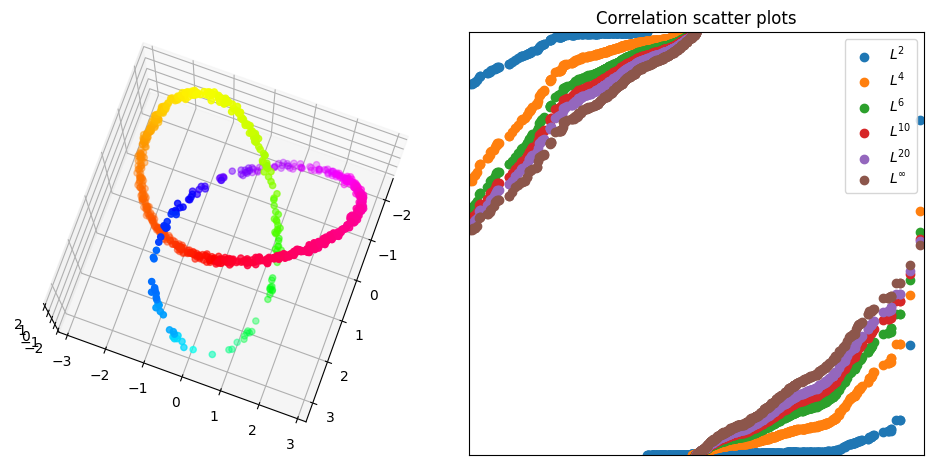

In [8]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(*data.T, c=lp_results[-1], cmap='hsv')
ax.view_init(elev=80, azim=20)
ax = fig.add_subplot(1, 2, 2)
for result, label in zip(lp_results, [2, 4, 6, '{10}', '{20}', '\infty']):
    ax.scatter(coord, result, label=f"$L^{label}$")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(0, 1)
plt.legend()
ax.set_title('Correlation scatter plots')
plt.tight_layout()
plt.show()
plt.close()
